In [14]:
import os
from keras.preprocessing.image import ImageDataGenerator 
# https://keras.io/api/preprocessing/image/#image-data-preprocessing
from keras.applications.imagenet_utils import preprocess_input

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.activations import relu, sigmoid
from keras.callbacks import EarlyStopping

from keras.optimizers import Adam
from keras.losses import binary_crossentropy
from keras.metrics import accuracy

import matplotlib.pyplot as plt

Verificando si las carpetas necesarias estan disponibles

In [15]:
pathTrain = './dataset/catdog/train'
pathTest = './dataset/catdog/test'

if (os.path.exists(pathTrain) and os.path.exists(pathTest)):
    print('OK')
else:
    print('No existen carpetas')
    print('Descomprima el archivo catdog.zip o puede descargar otro dataset: https://www.kaggle.com/arpitjain007/dog-vs-cat-fastai')


OK


Crear un generador de nuevas imagenes

In [16]:
images_increased = 5
width_shape = 224
height_shape = 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rotation_range=20, # rota 20 grados
    zoom_range=0.2, # zoom
    width_shift_range=0.1, # desplazar 10%
    height_shift_range=0.1,  # desplazar 10%
    horizontal_flip=True, # invertir horizontalmente
    vertical_flip=False,
    preprocessing_function=preprocess_input
)

valid_datagen = ImageDataGenerator(    
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(  
    pathTrain,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = valid_datagen.flow_from_directory(  
    pathTest,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    class_mode='binary')

Found 400 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


Crear modelo

In [17]:
model = Sequential()

inputShape = (height_shape, width_shape, 3)

model.add(Conv2D(filters=33, kernel_size=(3,3), input_shape=inputShape))
model.add(Conv2D(filters=32, kernel_size=(3,3)))
model.add(MaxPool2D())

model.add(Conv2D(filters=64, kernel_size=(3,3)))
model.add(Conv2D(filters=64, kernel_size=(3,3)))
model.add(MaxPool2D())

model.add(Flatten())

model.add(Dense(64, activation=relu))
model.add(Dense(23, activation=relu))
model.add(Dense(1, activation=sigmoid))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 222, 222, 33)      924       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 220, 220, 32)      9536      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 108, 108, 64)      18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 106, 106, 64)      36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 53, 53, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 179776)           

Compilar

In [18]:
adam = Adam(learning_rate=0.001)

model.compile(
    optimizer=adam,
    loss=binary_crossentropy,
    metrics=[accuracy]
)

In [19]:
# Configuración del callback de EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

Entrenar

In [20]:
epoch = 10

history = model.fit(
    train_generator,
    steps_per_epoch=20,
    validation_data=validation_generator,
    validation_steps=50,
    epochs=epoch,
    callbacks=[early_stopping]
)

Epoch 1/10
20/20 [==============================] - 121s 6s/step - loss: 61.7003 - accuracy: 0.3702 - val_loss: 61.6264 - val_accuracy: 0.2140
Epoch 2/10
20/20 [==============================] - 115s 6s/step - loss: 31.2706 - accuracy: 0.2796 - val_loss: 17.2772 - val_accuracy: 0.2320
Epoch 3/10
20/20 [==============================] - 134s 7s/step - loss: 14.1933 - accuracy: 0.1859 - val_loss: 8.0200 - val_accuracy: 0.2350
Epoch 4/10
20/20 [==============================] - 171s 9s/step - loss: 5.6640 - accuracy: 0.1447 - val_loss: 12.7601 - val_accuracy: 0.3180
Epoch 5/10
20/20 [==============================] - 191s 10s/step - loss: 5.3463 - accuracy: 0.1554 - val_loss: 4.3583 - val_accuracy: 0.2050
Epoch 6/10
20/20 [==============================] - 173s 9s/step - loss: 4.6188 - accuracy: 0.1365 - val_loss: 7.4470 - val_accuracy: 0.1630
Epoch 7/10
20/20 [==============================] - 161s 8s/step - loss: 3.7907 - accuracy: 0.0724 - val_loss: 1.3835 - val_accuracy: 0.0160
Epoch 

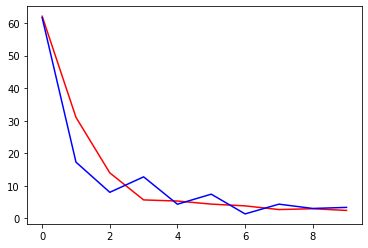

In [21]:
history.history
plt.plot(range(len(history.history['loss'])), history.history['loss'], color='red')
plt.plot(range(len(history.history['val_loss'])), history.history['val_loss'], color='blue')

plt.show()